In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import cv2
import glob
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
data = pd.read_csv('fer2013/fer2013.csv')
X = data['pixels']
y = data['emotion']

X = pd.Series([np.array(x.split()).astype(int) for x in X])
# convert one column as list of ints into dataframe where each item in array is a column
X = pd.DataFrame(np.matrix(X.tolist()))

# CALC AUC_ROC, binarizing each lable
y_b = pd.DataFrame(label_binarize(y, classes=[0,1,2,3,4,5,6]))
n_classes = y_b.shape[1]

In [22]:
# This function plots the given sample set of images as a grid with labels 
# if labels are available.
def plot_sample(S,w=48,h=48,labels=None):
    m = len(S);
  
    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)));
    display_cols = int(np.ceil(m / display_rows));
   
    fig = plt.figure()
    S = S.as_matrix()
    for i in range(0,m):
        arr = S[i,:]
        arr = arr.reshape((w,h))
        ax = fig.add_subplot(display_rows,display_cols , i+1)
        ax.imshow(arr, aspect='auto', cmap=plt.get_cmap('gray'))
        if labels is not None:
            ax.text(0,0, '{}'.format(labels[i]), bbox={'facecolor':'white', 'alpha':0.8,'pad':2})
        ax.axis('off')
    plt.show()
    
    print ('0=Angry', '1=Disgust', '2=Fear', '3=Happy', '4=Sad', '5=Surprise', '6=Neutral')

In [10]:
fishface = cv2.face.createFisherFaceRecognizer(num_components=7)
X_train, X_test, y_train, y_test = train_test_split(X, y_b, test_size=0.3)

y_train_not_binary = np.array([x.argmax(axis=0) for x in y_train.as_matrix()])

fishface.train(X_train.as_matrix(), y_train_not_binary)
prediction =[fishface.predict(x)[0] for x in X_test.as_matrix() ]

In [18]:
predictions_bin = label_binarize(prediction, classes=[0,1,2,3,4,5,6])

In [20]:
 # Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test.as_matrix()[:,i], predictions_bin[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.as_matrix().ravel(), predictions_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
print ("ROC_AUC (micro) score is {:.04f} with alpha".format(roc_auc["micro"]))

ROC_AUC (micro) score is 0.5940 with alpha


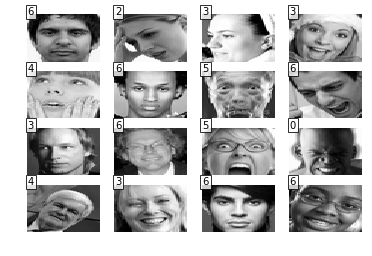

0=Angry 1=Disgust 2=Fear 3=Happy 4=Sad 5=Surprise 6=Neutral


In [23]:
sample = X_test.sample(16)
plot_sample(sample,48,48,[fishface.predict(x)[0] for x in sample.as_matrix() ])

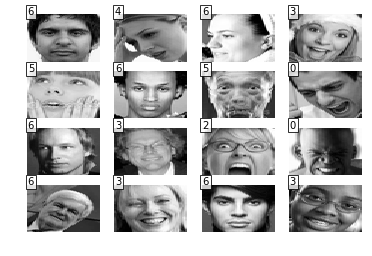

0=Angry 1=Disgust 2=Fear 3=Happy 4=Sad 5=Surprise 6=Neutral


In [25]:
p=y_test.loc[sample.index].as_matrix()
plot_sample(sample,48,48,[x.argmax(axis=0) for x in p])

In [ ]:
fishface.save("fishface.model") 